# Exercise 1 / Q10

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)
import pandas as pd
from dataclasses import dataclass

Boston = pd.read_csv('./Boston.csv')
Carseats = pd.read_csv('Carseats.csv')

Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## (a)

>Sales = $B_0$ + $B_1$(Price) + $B_2$(Urban) + $B_3$(US)

In [91]:
df = Carseats

df['Urban'] = df['Urban'].map({'Yes': 1, 'No': 0})
df['US'] = df['US'].map({'Yes': 1, 'No': 0})

X = df[['Price', 'Urban', 'US']]
y = df['Sales']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

# (b)

In [92]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           2.39e-23
Time:                        17:26:14   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
US             1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# (c)

> $Y= \beta_0 + X_1 \beta_1 + X_2 \beta_2  + X_3 \beta_3$


>$\textbf{Sales} = 13.04 - 0.05(Price) - 0.02(Urban) + 1.2(US | {"Yes"=1; "No"=2;})$

# (d)

> The null hypothesis can be rejected given the p calue is highly significant 

# (e)

In [93]:
y = df['Sales']
X = df[['Price', 'US']]
X = sm.add_constant(X)
model2 = sm.OLS(y, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           2.66e-24
Time:                        17:26:14   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US             1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# (f)

> Both model and model2 have an $R^2$ of .239, meaning the model only accounts for 23.9% of the variance in the data. Neither model fits the data well. 

# (g)

In [94]:
model2.conf_int(alpha=0.05)

,0,1
const,11.79032,14.271265
Price,-0.06476,-0.044195
US,0.69152,1.707766


# Exercise 2 / Q15

# (a)

In [95]:
Boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [96]:
single_coef = np.array([])
def pr(predictor):
    global single_coef
    y = Boston['crim']
    X = Boston[[predictor]]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    single_coef = np.append(single_coef, model.params[predictor])
    return model.summary()


$crim=\beta_0+\beta_1zn => 4.46-0.07x$

In [97]:
pr('zn')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           5.51e-06
Time:                        17:26:14   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4537      0.417     10.675      0.000       3.634       5.273
zn            -0.0739      0.016     -4.594      0.000      -0.106      -0.042
==============================================================================
Omnibus:                      567.443   Durbin-Watson:                   0.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32753.004
Skew:                           5.257   Prob(JB):                         0.00
Kurtosis:                      40.986   Cond. No.                         28.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$crim=\beta_0+\beta_1indus => -2.06 + 0.51x$

In [98]:
pr('indus')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     99.82
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           1.45e-21
Time:                        17:26:14   Log-Likelihood:                -1760.6
No. Observations:                 506   AIC:                             3525.
Df Residuals:                     504   BIC:                             3534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0637      0.667     -3.093      0.002      -3.375      -0.753
indus          0.5098      0.051      9.991      0.000       0.410       0.610
==============================================================================
Omnibus:                      585.118   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41418.938
Skew:                           5.449   Prob(JB):                         0.00
Kurtosis:                      45.962   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$crim=\beta_0+\beta_1chas => 3.74 - 1.89x$

In [99]:
pr('chas')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Sun, 22 Sep 2024   Prob (F-statistic):              0.209
Time:                        17:26:14   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7444      0.396      9.453      0.000       2.966       4.523
chas          -1.8928      1.506     -1.257      0.209      -4.852       1.066
==============================================================================
Omnibus:                      561.663   Durbin-Watson:                   0.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30645.429
Skew:                           5.191   Prob(JB):                         0.00
Kurtosis:                      39.685   Cond. No.                         3.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$crim=\beta_0+\beta_1nox => -13.72 + 31.25x$

In [100]:
pr('nox')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     108.6
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           3.75e-23
Time:                        17:26:14   Log-Likelihood:                -1757.0
No. Observations:                 506   AIC:                             3518.
Df Residuals:                     504   BIC:                             3526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.7199      1.699     -8.073      0.000     -17.059     -10.381
nox           31.2485      2.999     10.419      0.000      25.356      37.141
==============================================================================
Omnibus:                      591.712   Durbin-Watson:                   0.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43138.106
Skew:                           5.546   Prob(JB):                         0.00
Kurtosis:                      46.852   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$crim=\beta_0+\beta_1rm 20.48 - 2.68x$

In [101]:
pr('rm')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     25.45
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           6.35e-07
Time:                        17:26:14   Log-Likelihood:                -1793.9
No. Observations:                 506   AIC:                             3592.
Df Residuals:                     504   BIC:                             3600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.4818      3.364      6.088      0.000      13.872      27.092
rm            -2.6841      0.532     -5.045      0.000      -3.729      -1.639
==============================================================================
Omnibus:                      575.717   Durbin-Watson:                   0.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36658.093
Skew:                           5.345   Prob(JB):                         0.00
Kurtosis:                      43.305   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$crim=\beta_0+\beta_1age => -3.78 + 0.11x$

In [102]:
pr('age')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     71.62
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           2.85e-16
Time:                        17:26:14   Log-Likelihood:                -1772.7
No. Observations:                 506   AIC:                             3549.
Df Residuals:                     504   BIC:                             3558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7779      0.944     -4.002      0.000      -5.633      -1.923
age            0.1078      0.013      8.463      0.000       0.083       0.133
==============================================================================
Omnibus:                      574.509   Durbin-Watson:                   0.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36741.903
Skew:                           5.322   Prob(JB):                         0.00
Kurtosis:                      43.366   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$crim=\beta_0+\beta_1dis => 9.59 - 1.55x$

In [103]:
pr('dis')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     84.89
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           8.52e-19
Time:                        17:26:14   Log-Likelihood:                -1767.0
No. Observations:                 506   AIC:                             3538.
Df Residuals:                     504   BIC:                             3546.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4993      0.730     13.006      0.000       8.064      10.934
dis           -1.5509      0.168     -9.213      0.000      -1.882      -1.220
==============================================================================
Omnibus:                      576.519   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37426.729
Skew:                           5.348   Prob(JB):                         0.00
Kurtosis:                      43.753   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$crim=\beta_0+\beta_1rad => -2.29 + 0.62x$

In [104]:
pr('rad')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     323.9
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           2.69e-56
Time:                        17:26:14   Log-Likelihood:                -1680.8
No. Observations:                 506   AIC:                             3366.
Df Residuals:                     504   BIC:                             3374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2872      0.443     -5.157      0.000      -3.158      -1.416
rad            0.6179      0.034     17.998      0.000       0.550       0.685
==============================================================================
Omnibus:                      656.459   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75417.007
Skew:                           6.478   Prob(JB):                         0.00
Kurtosis:                      61.389   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$crim=\beta_0+\beta_1tax => -8.53 + 0.03x$

In [105]:
pr('tax')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     259.2
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           2.36e-47
Time:                        17:26:14   Log-Likelihood:                -1701.4
No. Observations:                 506   AIC:                             3407.
Df Residuals:                     504   BIC:                             3415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.5284      0.816    -10.454      0.000     -10.131      -6.926
tax            0.0297      0.002     16.099      0.000       0.026       0.033
==============================================================================
Omnibus:                      635.377   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63763.835
Skew:                           6.156   Prob(JB):                         0.00
Kurtosis:                      56.599   Cond. No.                     1.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$crim=\beta_0+\beta_1ptratio => -17.65 + 1.15x$

In [106]:
pr('ptratio')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     46.26
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           2.94e-11
Time:                        17:26:14   Log-Likelihood:                -1784.1
No. Observations:                 506   AIC:                             3572.
Df Residuals:                     504   BIC:                             3581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.6469      3.147     -5.607      0.000     -23.830     -11.464
ptratio        1.1520      0.169      6.801      0.000       0.819       1.485
==============================================================================
Omnibus:                      568.053   Durbin-Watson:                   0.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34221.853
Skew:                           5.245   Prob(JB):                         0.00
Kurtosis:                      41.899   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$crim=\beta_0+\beta_1lstat = -3.33 + 0.55x$

In [107]:
pr('lstat')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     132.0
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           2.65e-27
Time:                        17:26:14   Log-Likelihood:                -1747.5
No. Observations:                 506   AIC:                             3499.
Df Residuals:                     504   BIC:                             3507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3305      0.694     -4.801      0.000      -4.694      -1.968
lstat          0.5488      0.048     11.491      0.000       0.455       0.643
==============================================================================
Omnibus:                      601.306   Durbin-Watson:                   1.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49918.826
Skew:                           5.645   Prob(JB):                         0.00
Kurtosis:                      50.331   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$crim=\beta_0+\beta_1medv => 11.80 - 0.04x$

In [108]:
pr('medv')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           1.17e-19
Time:                        17:26:14   Log-Likelihood:                -1765.0
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7965      0.934     12.628      0.000       9.961      13.632
medv          -0.3632      0.038     -9.460      0.000      -0.439      -0.288
==============================================================================
Omnibus:                      558.880   Durbin-Watson:                   0.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32740.044
Skew:                           5.108   Prob(JB):                         0.00
Kurtosis:                      41.059   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# (b)

$H_0:\beta_j=0$

In [109]:
y = Boston['crim']
X = Boston[['zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','lstat','medv']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           2.03e-56
Time:                        17:26:14   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7784      7.082      1.946      0.052      -0.136      27.693
zn             0.0457      0.019      2.433      0.015       0.009       0.083
indus         -0.0584      0.084     -0.698      0.486      -0.223       0.106
chas          -0.8254      1.183     -0.697      0.486      -3.150       1.500
nox           -9.9576      5.290     -1.882      0.060     -20.351       0.436
rm             0.6289      0.607      1.036      0.301      -0.564       1.822
age           -0.0008      0.018     -0.047      0.962      -0.036       0.034
dis           -1.0122      0.282     -3.584      0.000      -1.567      -0.457
rad            0.6125      0.088      6.997      0.000       0.440       0.784
tax           -0.0038      0.005     -0.730      0.466      -0.014       0.006
ptratio       -0.3041      0.186     -1.632      0.103      -0.670       0.062
lstat          0.1388      0.076      1.833      0.067      -0.010       0.288
medv          -0.2201      0.060     -3.678      0.000      -0.338      -0.103
==============================================================================
Omnibus:                      663.436   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80856.852
Skew:                           6.579   Prob(JB):                         0.00
Kurtosis:                      63.514   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> zn, age, dis, rad, and medv have a strong relationship with crim, thus we can reject the null hypothesis for these predictors. A strong relationship is indicated by a corresponding $P_v\le0.05$

# (c)

Text(0, 0.5, 'Multiple Coef')

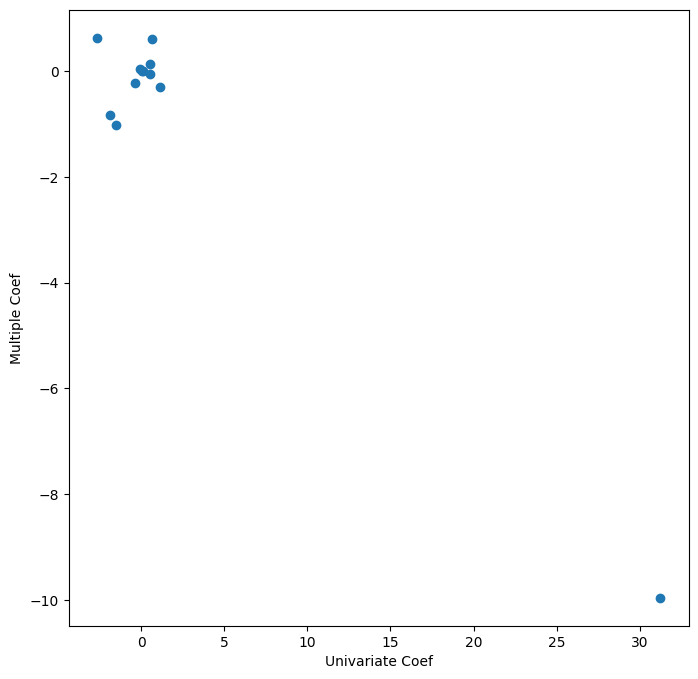

In [110]:
# Getting coefficients from model, excluding const
multiple_coef = model.params.values
multiple_coef = np.array(multiple_coef)
multiple_coef = multiple_coef[1:]

single_coef = np.array(single_coef)

plt.figure(figsize=(8,8))
plt.scatter(single_coef, multiple_coef)
plt.xlabel('Univariate Coef')
plt.ylabel('Multiple Coef')

# (d)

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

In [111]:
y = Boston['crim']
def poly(predictor, degree=3): 
    x = Boston[predictor]
    polynomial = pd.DataFrame({f'{predictor}^i': x**i for i in range(1,degree+1)})
    polynomial = sm.add_constant(polynomial)
    model = sm.OLS(y, polynomial).fit()
    return model.summary()

In [112]:
poly('medv')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     17.43
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           3.52e-05
Time:                        17:26:15   Log-Likelihood:                -1797.8
No. Observations:                 506   AIC:                             3600.
Df Residuals:                     504   BIC:                             3608.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6991      0.457     10.273      0.000       3.800       5.598
medv^i     -6.029e-05   1.44e-05     -4.174      0.000   -8.87e-05   -3.19e-05
==============================================================================
Omnibus:                      561.067   Durbin-Watson:                   0.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31086.642
Skew:                           5.173   Prob(JB):                         0.00
Kurtosis:                      39.979   Cond. No.                     3.85e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
poly('lstat')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     117.1
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           1.13e-24
Time:                        17:26:15   Log-Likelihood:                -1753.5
No. Observations:                 506   AIC:                             3511.
Df Residuals:                     504   BIC:                             3520.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4299      0.400      3.579      0.000       0.645       2.215
lstat^i        0.0005   4.71e-05     10.819      0.000       0.000       0.001
==============================================================================
Omnibus:                      613.483   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55401.668
Skew:                           5.816   Prob(JB):                         0.00
Kurtosis:                      52.925   Cond. No.                     9.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
poly('ptratio')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     50.88
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           3.43e-12
Time:                        17:26:15   Log-Likelihood:                -1782.0
No. Observations:                 506   AIC:                             3568.
Df Residuals:                     504   BIC:                             3577.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7016      1.221     -3.849      0.000      -7.101      -2.302
ptratio^i      0.0013      0.000      7.133      0.000       0.001       0.002
==============================================================================
Omnibus:                      568.804   Durbin-Watson:                   0.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34722.545
Skew:                           5.251   Prob(JB):                         0.00
Kurtosis:                      42.200   Cond. No.                     2.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
poly('tax')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     288.6
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           1.68e-51
Time:                        17:26:15   Log-Likelihood:                -1691.8
No. Observations:                 506   AIC:                             3388.
Df Residuals:                     504   BIC:                             3396.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0199      0.409     -2.492      0.013      -1.824      -0.216
tax^i       4.374e-08   2.57e-09     16.987      0.000    3.87e-08    4.88e-08
==============================================================================
Omnibus:                      641.628   Durbin-Watson:                   1.286
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68882.945
Skew:                           6.235   Prob(JB):                         0.00
Kurtosis:                      58.782   Cond. No.                     2.13e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
poly('rad')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     335.6
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           7.79e-58
Time:                        17:26:15   Log-Likelihood:                -1677.2
No. Observations:                 506   AIC:                             3358.
Df Residuals:                     504   BIC:                             3367.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2744      0.348      0.788      0.431      -0.409       0.958
rad^i          0.0009   4.93e-05     18.320      0.000       0.001       0.001
==============================================================================
Omnibus:                      659.512   Durbin-Watson:                   1.350
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77696.797
Skew:                           6.522   Prob(JB):                         0.00
Kurtosis:                      62.288   Cond. No.                     8.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
poly('dis')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     26.17
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           4.46e-07
Time:                        17:26:15   Log-Likelihood:                -1793.6
No. Observations:                 506   AIC:                             3591.
Df Residuals:                     504   BIC:                             3600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7269      0.432     10.941      0.000       3.878       5.576
dis^i         -0.0097      0.002     -5.115      0.000      -0.013      -0.006
==============================================================================
Omnibus:                      568.820   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33094.166
Skew:                           5.276   Prob(JB):                         0.00
Kurtosis:                      41.188   Cond. No.                         263.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
poly('age')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     95.86
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           7.74e-21
Time:                        17:26:15   Log-Likelihood:                -1762.3
No. Observations:                 506   AIC:                             3529.
Df Residuals:                     504   BIC:                             3537.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8592      0.576     -1.492      0.136      -1.991       0.273
age^i       9.478e-06   9.68e-07      9.791      0.000    7.58e-06    1.14e-05
==============================================================================
Omnibus:                      576.849   Durbin-Watson:                   0.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38680.010
Skew:                           5.337   Prob(JB):                         0.00
Kurtosis:                      44.481   Cond. No.                     9.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
poly('rm')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     18.47
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           2.08e-05
Time:                        17:26:15   Log-Likelihood:                -1797.3
No. Observations:                 506   AIC:                             3599.
Df Residuals:                     504   BIC:                             3607.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2180      1.136      7.237      0.000       5.987      10.449
rm^i          -0.0179      0.004     -4.297      0.000      -0.026      -0.010
==============================================================================
Omnibus:                      571.272   Durbin-Watson:                   0.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34776.480
Skew:                           5.293   Prob(JB):                         0.00
Kurtosis:                      42.210   Cond. No.                         825.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
poly('nox')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     80.54
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           5.64e-18
Time:                        17:26:15   Log-Likelihood:                -1768.9
No. Observations:                 506   AIC:                             3542.
Df Residuals:                     504   BIC:                             3550.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1120      0.635     -1.750      0.081      -2.360       0.136
nox^i         24.3459      2.713      8.974      0.000      19.016      29.676
==============================================================================
Omnibus:                      584.305   Durbin-Watson:                   0.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40380.381
Skew:                           5.447   Prob(JB):                         0.00
Kurtosis:                      45.386   Cond. No.                         7.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
poly('chas')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Sun, 22 Sep 2024   Prob (F-statistic):              0.209
Time:                        17:26:15   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7444      0.396      9.453      0.000       2.966       4.523
chas^i        -1.8928      1.506     -1.257      0.209      -4.852       1.066
==============================================================================
Omnibus:                      561.663   Durbin-Watson:                   0.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30645.429
Skew:                           5.191   Prob(JB):                         0.00
Kurtosis:                      39.685   Cond. No.                         3.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
poly('indus')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     48.68
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           9.52e-12
Time:                        17:26:15   Log-Likelihood:                -1783.0
No. Observations:                 506   AIC:                             3570.
Df Residuals:                     504   BIC:                             3579.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6316      0.463      3.525      0.000       0.722       2.541
indus^i        0.0007   9.33e-05      6.977      0.000       0.000       0.001
==============================================================================
Omnibus:                      569.193   Durbin-Watson:                   0.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35694.735
Skew:                           5.243   Prob(JB):                         0.00
Kurtosis:                      42.788   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
poly('zn')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     8.585
Date:                Sun, 22 Sep 2024   Prob (F-statistic):            0.00354
Time:                        17:26:15   Log-Likelihood:                -1802.1
No. Observations:                 506   AIC:                             3608.
Df Residuals:                     504   BIC:                             3617.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9594      0.397      9.961      0.000       3.179       4.740
zn^i         -7.2e-06   2.46e-06     -2.930      0.004    -1.2e-05   -2.37e-06
==============================================================================
Omnibus:                      564.662   Durbin-Watson:                   0.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31569.340
Skew:                           5.228   Prob(JB):                         0.00
Kurtosis:                      40.256   Cond. No.                     1.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Exercise 3

# (a)

> from sklearn.neighbors import KNeighborsRegressor

# (b)

In [124]:
# def euclidean(x1, x2):
#     return np.sqrt(np.sum((x1 - x2) ** 2))
def knn(x, y, xeval, k):
    """ 
    :param np.ndarray x: matrix of predictor values (n-by-p)
    :param np.ndarray y: response vector (length n)
    :param np.ndarray xeval: matrix of predictor values used for evaluation (m-by-p)
    :param int k: number of nearest neighbors to use for regression
    """
    points = xeval.shape[0]
    predictions = np.zeros(points)
    
    for i in range(points):
        distances = np.linalg.norm(x - xeval[i], axis=1)
        neighbors = np.argsort(distances)[:k]
        predictions[i] = np.mean(y[neighbors])
    return predictions

# (c)

In [125]:
@dataclass
class T:
    train: pd.DataFrame
    test: pd.DataFrame
def sample(df):
    sample = df.sample(frac=1, random_state=42).reset_index(drop=True)
    size = int(len(sample) * .8)
    train = sample[:size] # 80%
    test = sample[size:] # 20%
    
    return T(train=train, test=test)

In [133]:
Advertising = pd.read_csv('Advertising.csv')
data = sample(Advertising)
print(f'{data.train.head()} {data.test.head()}')

   Unnamed: 0     TV  radio  newspaper  sales
0          96  163.3   31.6       52.9   16.9
1          16  195.4   47.7       52.9   22.4
2          31  292.9   28.3       43.2   21.4
3         159   11.7   36.9       45.2    7.3
4         129  220.3   49.0        3.2   24.7      Unnamed: 0     TV  radio  newspaper  sales
160         176  276.9   48.9       41.8   27.0
161         135   36.9   38.6       65.6   10.8
162         168  206.8    5.2       19.4   12.2
163         184  287.6   43.0       71.8   26.2
164          64  102.7   29.6        8.4   14.0


# (d)

In [131]:
X = Advertising[['TV', 'radio', 'newspaper']].values
y = Advertising['sales'].values

mse_arr = []
for k in range(1,11):
    pr = knn(X, y, X, k)
    mse = mean_squared_error(y, pr)
    mse_arr.append((k, mse)) 
    
mse_arr
for i in mse_arr:
    print(f'k: {i[0]} MSE: {i[1]:.3f}')

k: 1 MSE: 0.000
k: 2 MSE: 0.559
k: 3 MSE: 0.866
k: 4 MSE: 1.050
k: 5 MSE: 1.275
k: 6 MSE: 1.475
k: 7 MSE: 1.448
k: 8 MSE: 1.710
k: 9 MSE: 1.811
k: 10 MSE: 2.068


# (e)

In [138]:
model = LinearRegression()
model.fit(X, y)
pr = model.predict(X)
mse = mean_squared_error(y, pr)
mse

2.7841263145109365

$KNN(X,y,X,10)=2.068 \\\ LinearRegression(X,y).MSE=2.784$ 

The KNN model fits the data better than the linear regression model given $2.068 < 2.784$

# (f)

In [140]:
X = data.test[['TV', 'radio', 'newspaper']].values
y = data.test['sales'].values

mse_arr = []
for k in range(1,11):
    pr = knn(X, y, X, k)
    mse = mean_squared_error(y, pr)
    mse_arr.append((k, mse)) 
    
mse_arr
for i in mse_arr:
    print(f'k: {i[0]} MSE: {i[1]:.3f}')

k: 1 MSE: 0.000
k: 2 MSE: 1.596
k: 3 MSE: 2.974
k: 4 MSE: 5.023
k: 5 MSE: 6.107
k: 6 MSE: 6.887
k: 7 MSE: 7.186
k: 8 MSE: 8.273
k: 9 MSE: 8.922
k: 10 MSE: 9.761


# (g)

In [141]:
X = data.test[['TV', 'radio', 'newspaper']].values
y = data.test['sales'].values

model = LinearRegression()
model.fit(X, y)
pr = model.predict(X)
mse = mean_squared_error(y, pr)
mse

3.4037346309382825

$KNN(X,y,X,10)=9.761 \\\ LinearRegression(X,y).MSE=3.403$

The linear regression model fits the data better than KNN given $3.403 < 9.761$ 